# Build a classification model: Delicious Asian and Indian Cuisines

## Introduction to classification: Clean, prep, and visualize your data

In these four lessons, you will explore a fundamental focus of classic machine learning - *classification*. We will walk through using various classification algorithms with a dataset about all the brilliant cuisines of Asia and India. Hope you're hungry!


Classification is a form of [supervised learning](https://wikipedia.org/wiki/Supervised_learning) that bears a lot in common with regression techniques. In classification, you train a model to predict which `category` an item belongs to. If machine learning is all about predicting values or names to things by using datasets, then classification generally falls into two groups: *binary classification* and *multiclass classification*.

Remember:

-   **Linear regression** helped you predict relationships between variables and make accurate predictions on where a new datapoint would fall in relationship to that line. So, you could predict a numeric values such as *what price a pumpkin would be in September vs. December*, for example.

-   **Logistic regression** helped you discover "binary categories": at this price point, *is this pumpkin orange or not-orange*?

Classification uses various algorithms to determine other ways of determining a data point's label or class. Let's work with this cuisine data to see whether, by observing a group of ingredients, we can determine its cuisine of origin.

### [**Pre-lecture quiz**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/19/)

### **Introduction**

Classification is one of the fundamental activities of the machine learning researcher and data scientist. From basic classification of a binary value ("is this email spam or not?"), to complex image classification and segmentation using computer vision, it's always useful to be able to sort data into classes and ask questions of it.

To state the process in a more scientific way, your classification method creates a predictive model that enables you to map the relationship between input variables to output variables.



Before starting the process of cleaning our data, visualizing it, and prepping it for our ML tasks, let's learn a bit about the various ways machine learning can be leveraged to classify data.

Derived from [statistics](https://wikipedia.org/wiki/Statistical_classification), classification using classic machine learning uses features, such as `smoker`, `weight`, and `age` to determine *likelihood of developing X disease*. As a supervised learning technique similar to the regression exercises you performed earlier, your data is labeled and the ML algorithms use those labels to classify and predict classes (or 'features') of a dataset and assign them to a group or outcome.

✅ Take a moment to imagine a dataset about cuisines. What would a multiclass model be able to answer? What would a binary model be able to answer? What if you wanted to determine whether a given cuisine was likely to use fenugreek? What if you wanted to see if, given a present of a grocery bag full of star anise, artichokes, cauliflower, and horseradish, you could create a typical Indian dish?

### **Hello 'classifier'**

The question we want to ask of this cuisine dataset is actually a **multiclass question**, as we have several potential national cuisines to work with. Given a batch of ingredients, which of these many classes will the data fit?

Tidymodels offers several different algorithms to use to classify data, depending on the kind of problem you want to solve. In the next two lessons, you'll learn about several of these algorithms.

#### **Prerequisite**

For this lesson, we'll require the following packages to clean, prep and visualize our data:

-   `tidyverse`: The [tidyverse](https://www.tidyverse.org/) is a [collection of R packages](https://www.tidyverse.org/packages) designed to makes data science faster, easier and more fun!

-   `tidymodels`: The [tidymodels](https://www.tidymodels.org/) framework is a [collection of packages](https://www.tidymodels.org/packages/) for modeling and machine learning.

-   `DataExplorer`: The [DataExplorer package](https://cran.r-project.org/web/packages/DataExplorer/vignettes/dataexplorer-intro.html) is meant to simplify and automate EDA process and report generation.

-   `themis`: The [themis package](https://themis.tidymodels.org/) provides Extra Recipes Steps for Dealing with Unbalanced Data.

You can have them installed as:

`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

Alternately, the script below checks whether you have the packages required to complete this module and installs them for you in case they are missing.

In [1]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, DataExplorer, themis, here)

Loading required package: pacman



We'll later load these awesome packages and make them available in our current R session. (This is for mere illustration, `pacman::p_load()` already did that for you)

## Exercise - clean and balance your data

The first task at hand, before starting this project, is to clean and **balance** your data to get better results

Let's meet the data!🕵️

In [2]:
# Import data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# View the first 5 rows
df %>% 
  slice_head(n = 5)


New names:
• `` -> `...1`
Rows: 2448 Columns: 385
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,indian,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
66,indian,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
67,indian,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
68,indian,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
69,indian,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


Interesting! From the looks of it, the first column is a kind of `id` column. Let's get a little more information about the data.

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2448,385,1,384,0,0,2448,942480,7615584


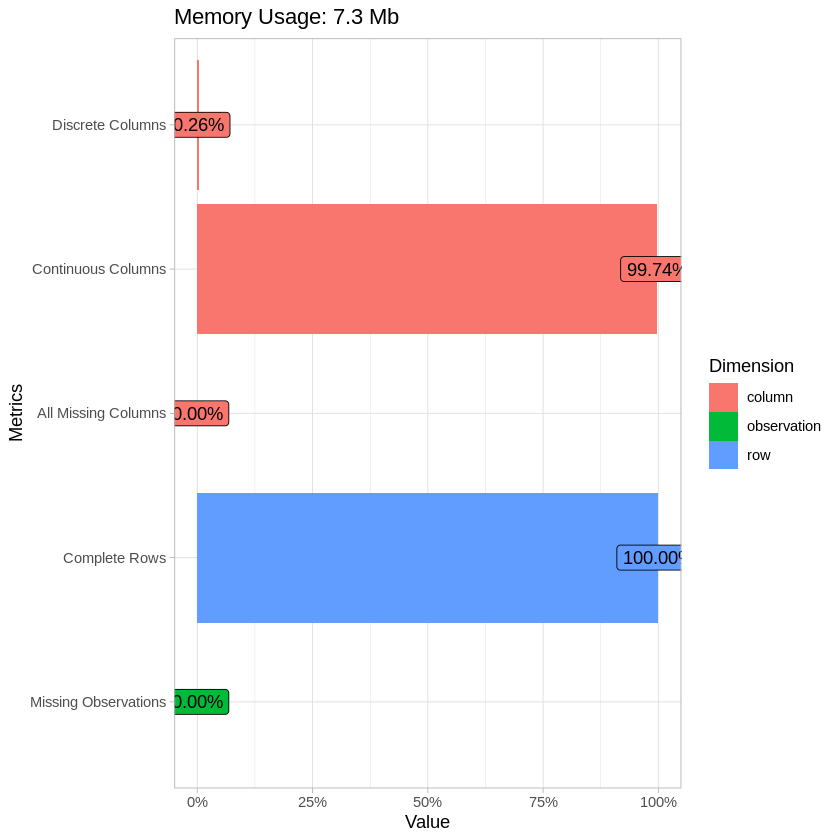

In [3]:
# Basic information about the data
df %>%
  introduce()

# Visualize basic information above
df %>% 
  plot_intro(ggtheme = theme_light())

From the output, we can immediately see that we have `2448` rows and `385` columns and `0` missing values. We also have 1 discrete column, *cuisine*.

## Exercise - learning about cuisines

Now the work starts to become more interesting. Let's discover the distribution of data, per cuisine.

cuisine,n
<chr>,<int>
thai,289
japanese,320
chinese,442
indian,598
korean,799


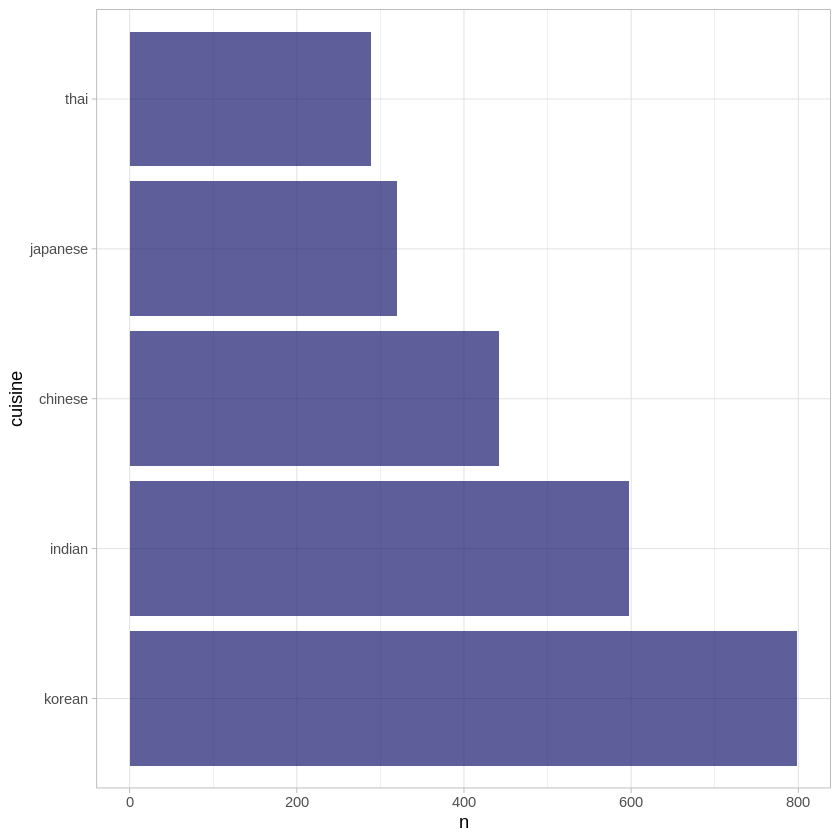

In [4]:
# Count observations per cuisine
df %>% 
  count(cuisine) %>% 
  arrange(n)

# Plot the distribution
theme_set(theme_light())
df %>% 
  count(cuisine) %>% 
  ggplot(mapping = aes(x = n, y = reorder(cuisine, -n))) +
  geom_col(fill = "midnightblue", alpha = 0.7) +
  ylab("cuisine")

There are a finite number of cuisines, but the distribution of data is uneven. You can fix that! Before doing so, explore a little more.

Next, let's assign each cuisine into its individual tibble and find out how much data is available (rows, columns) per cuisine.

> A [tibble](https://tibble.tidyverse.org/) is a modern data frame.



In [ ]:
# Create individual tibble for the cuisines
thai_df <- df %>% 
  filter(cuisine == "thai")
japanese_df <- df %>% 
  filter(cuisine == "japanese")
chinese_df <- df %>% 
  filter(cuisine == "chinese")
indian_df <- df %>% 
  filter(cuisine == "indian")
korean_df <- df %>% 
  filter(cuisine == "korean")


# Find out how much data is available per cuisine
cat(" thai df:", dim(thai_df), "\n",
    "japanese df:", dim(japanese_df), "\n",
    "chinese_df:", dim(chinese_df), "\n",
    "indian_df:", dim(indian_df), "\n",
    "korean_df:", dim(korean_df))

Perfect!😋

## **Exercise - Discovering top ingredients by cuisine using dplyr**

Now you can dig deeper into the data and learn what are the typical ingredients per cuisine. You should clean out recurrent data that creates confusion between cuisines, so let's learn about this problem.


Create a function `create_ingredient()` in R that returns an ingredient dataframe. This function will start by dropping an unhelpful column and sort through ingredients by their count.

The basic structure of a function in R is:

`myFunction <- function(arglist){`

**`...`**

**`return`**`(value)`

`}`

A tidy introduction to R functions can be found [here](https://skirmer.github.io/presentations/functions_with_r.html#1).

Let's get right into it! We'll make use of [dplyr verbs](https://dplyr.tidyverse.org/) which we have been learning in our previous lessons. As a recap:

-   `dplyr::select()`: help you pick which **columns** to keep or exclude.

-   `dplyr::pivot_longer()`: helps you to "lengthen" data, increasing the number of rows and decreasing the number of columns.

-   `dplyr::group_by()` and `dplyr::summarise()`: helps you to find find summary statistics for different groups, and put them in a nice table.

-   `dplyr::filter()`: creates a subset of the data only containing rows that satisfy your conditions.

-   `dplyr::mutate()`: helps you to create or modify columns.

Check out this [*art*-filled learnr tutorial](https://allisonhorst.shinyapps.io/dplyr-learnr/#section-welcome) by Allison Horst, that introduces some useful data wrangling functions in dplyr *(part of the Tidyverse)*

In [ ]:
# Creates a functions that returns the top ingredients by class

create_ingredient <- function(df){
  
  # Drop the id column which is the first colum
  ingredient_df = df %>% select(-1) %>% 
  # Transpose data to a long format
    pivot_longer(!cuisine, names_to = "ingredients", values_to = "count") %>% 
  # Find the top most ingredients for a particular cuisine
    group_by(ingredients) %>% 
    summarise(n_instances = sum(count)) %>% 
    filter(n_instances != 0) %>% 
  # Arrange by descending order
    arrange(desc(n_instances)) %>% 
    mutate(ingredients = factor(ingredients) %>% fct_inorder())
  
  
  return(ingredient_df)
} # End of function

Now we can use the function to get an idea of top ten most popular ingredient by cuisine. Let's take it out for a spin with `thai_df`


In [ ]:
# Call create_ingredient and display popular ingredients
thai_ingredient_df <- create_ingredient(df = thai_df)

thai_ingredient_df %>% 
  slice_head(n = 10)

In the previous section, we used `geom_col()`, let's see how you can use `geom_bar` too, to create bar charts. Use `?geom_bar` for further reading.

In [ ]:
# Make a bar chart for popular thai cuisines
thai_ingredient_df %>% 
  slice_head(n = 10) %>% 
  ggplot(aes(x = n_instances, y = ingredients)) +
  geom_bar(stat = "identity", width = 0.5, fill = "steelblue") +
  xlab("") + ylab("")

Let's do the same for the Japanese data

In [ ]:
# Get popular ingredients for Japanese cuisines and make bar chart
create_ingredient(df = japanese_df) %>% 
  slice_head(n = 10) %>%
  ggplot(aes(x = n_instances, y = ingredients)) +
  geom_bar(stat = "identity", width = 0.5, fill = "darkorange", alpha = 0.8) +
  xlab("") + ylab("")


What about the Chinese cuisines?


In [ ]:
# Get popular ingredients for Chinese cuisines and make bar chart
create_ingredient(df = chinese_df) %>% 
  slice_head(n = 10) %>%
  ggplot(aes(x = n_instances, y = ingredients)) +
  geom_bar(stat = "identity", width = 0.5, fill = "cyan4", alpha = 0.8) +
  xlab("") + ylab("")

Let's take a look at the Indian cuisines 🌶️.

In [ ]:
# Get popular ingredients for Indian cuisines and make bar chart
create_ingredient(df = indian_df) %>% 
  slice_head(n = 10) %>%
  ggplot(aes(x = n_instances, y = ingredients)) +
  geom_bar(stat = "identity", width = 0.5, fill = "#041E42FF", alpha = 0.8) +
  xlab("") + ylab("")

Finally, plot the Korean ingredients.

In [ ]:
# Get popular ingredients for Korean cuisines and make bar chart
create_ingredient(df = korean_df) %>% 
  slice_head(n = 10) %>%
  ggplot(aes(x = n_instances, y = ingredients)) +
  geom_bar(stat = "identity", width = 0.5, fill = "#852419FF", alpha = 0.8) +
  xlab("") + ylab("")

From the data visualizations, we can now drop the most common ingredients that create confusion between distinct cuisines, using `dplyr::select()`.

Everyone loves rice, garlic and ginger!

In [ ]:
# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger))

# Display new data set
df_select %>% 
  slice_head(n = 5)

## Preprocessing data using recipes 👩‍🍳👨‍🍳 - Dealing with imbalanced data ⚖️

<p >
   <img src="../../images/recipes.png"
   width="600"/>
   <figcaption>Artwork by @allison_horst</figcaption>

Given that this lesson is about cuisines, we have to put `recipes` into context .

Tidymodels provides yet another neat package: `recipes`- a package for preprocessing data.


Let's take a look at the distribution of our cuisines again.


In [ ]:
# Distribution of cuisines
old_label_count <- df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

old_label_count


As you can see, there is quite an unequal distribution in the number of cuisines. Korean cuisines are almost 3 times Thai cuisines. Imbalanced data often has negative effects on the model performance. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance. Many models perform best when the number of observations is equal and, thus, tend to struggle with unbalanced data.

There are majorly two ways of dealing with imbalanced data sets:

-   adding observations to the minority class: `Over-sampling` e.g using a SMOTE algorithm

-   removing observations from majority class: `Under-sampling`

Let's now demonstrate how to deal with imbalanced data sets using a `recipe`. A recipe can be thought of as a blueprint that describes what steps should be applied to a data set in order to get it ready for data analysis.

In [ ]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing data
cuisines_recipe <- recipe(cuisine ~ ., data = df_select) %>% 
  step_smote(cuisine)

cuisines_recipe

Let's break down our preprocessing steps.

-   The call to `recipe()` with a formula tells the recipe the *roles* of the variables using `df_select` data as the reference. For instance the `cuisine` column has been assigned an `outcome` role while the rest of the columns have been assigned a `predictor` role.

-   [`step_smote(cuisine)`](https://themis.tidymodels.org/reference/step_smote.html) creates a *specification* of a recipe step that synthetically generates new examples of the minority class using nearest neighbors of these cases.

Now, if we wanted to see the preprocessed data, we'd have to [**`prep()`**](https://recipes.tidymodels.org/reference/prep.html) and [**`bake()`**](https://recipes.tidymodels.org/reference/bake.html) our recipe.

`prep()`: estimates the required parameters from a training set that can be later applied to other data sets.

`bake()`: takes a prepped recipe and applies the operations to any data set.


In [ ]:
# Prep and bake the recipe
preprocessed_df <- cuisines_recipe %>% 
  prep() %>% 
  bake(new_data = NULL) %>% 
  relocate(cuisine)

# Display data
preprocessed_df %>% 
  slice_head(n = 5)

# Quick summary stats
preprocessed_df %>% 
  introduce()

Let's now check the distribution of our cuisines and compare them with the imbalanced data.

In [ ]:
# Distribution of cuisines
new_label_count <- preprocessed_df %>% 
  count(cuisine) %>% 
  arrange(desc(n))

list(new_label_count = new_label_count,
     old_label_count = old_label_count)

Yum! The data is nice and clean, balanced, and very delicious 😋!

> Normally, a recipe is usually used as a preprocessor for modelling where it defines what steps should be applied to a data set in order to get it ready for modelling. In that case, a `workflow()` is typically used (as we have already seen in our previous lessons) instead of manually estimating a recipe
>
> As such, you don't typically need to **`prep()`** and **`bake()`** recipes when you use tidymodels, but they are helpful functions to have in your toolkit for confirming that recipes are doing what you expect like in our case.
>
> When you **`bake()`** a prepped recipe with **`new_data = NULL`**, you get the data that you provided when defining the recipe back, but having undergone the preprocessing steps.

Let's now save a copy of this data for use in future lessons:


In [ ]:
# Save preprocessed data
write_csv(preprocessed_df, "../../../data/cleaned_cuisines_R.csv")

This fresh CSV can now be found in the root data folder.

**🚀Challenge**

This curriculum contains several interesting datasets. Dig through the `data` folders and see if any contain datasets that would be appropriate for binary or multi-class classification? What questions would you ask of this dataset?

## [**Post-lecture quiz**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/20/)

## **Review & Self Study**

-   Check out [package themis](https://github.com/tidymodels/themis). What other techniques could we use to deal with imbalanced data?

-   Tidy models [reference website](https://www.tidymodels.org/start/).

-   H. Wickham and G. Grolemund, [*R for Data Science: Visualize, Model, Transform, Tidy, and Import Data*](https://r4ds.had.co.nz/).

#### THANK YOU TO:

[`Allison Horst`](https://twitter.com/allison_horst/) for creating the amazing illustrations that make R more welcoming and engaging. Find more illustrations at her [gallery](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM).

[Cassie Breviu](https://www.twitter.com/cassieview) and [Jen Looper](https://www.twitter.com/jenlooper) for creating the original Python version of this module ♥️

<p >
   <img src="../../images/r_learners_sm.jpeg"
   width="600"/>
   <figcaption>Artwork by @allison_horst</figcaption>
